In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import sympy as sym

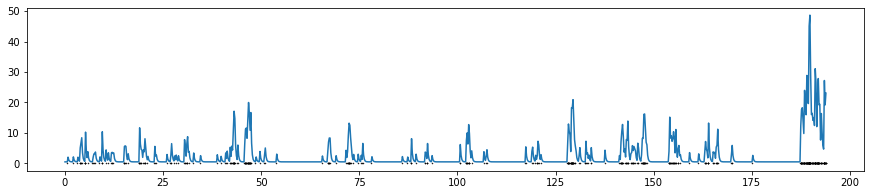

In [12]:
mu=0.5
a=4
b=5
N=500
T=[]
S=[1]

def CIF(timelines,t):
    intensity=0
    for i in range(len(timelines)):
        if t>timelines[i]:
            intensity+=a*np.exp(-b*(t-timelines[i]))
    return intensity+mu

def S_update(i,T,S):
    S.append(np.e**(-b*(T[i]-T[i-1]))*S[i-1]+1)
def function(k,T,S,U,u):
    return np.log(U)+mu*(u-T[k])+(a/b)*S[k]*(1-np.e**(-b*(u-T[k])))
def function_prime(k,T,S,U,u):
    return mu+a*S[k]*np.e**(-b*(u-T[k]))
    
    
    
for i in range(0,N):
    U=sp.uniform.rvs(size=1)[0]
    if i+1==1:
        T.append(-np.log(U)/mu)
    else:
        u=T[i-1]-np.log(U)/mu
        for j in range(100):
            u=u-function(i-1,T,S,U,u)/function_prime(i-1,T,S,U,u)
        T.append(u)
        S_update(i,T,S)
x=np.linspace(0,T[-1],1000)
plt.figure(figsize=[15,3])
plt.plot(x,[CIF(T,t) for t in x])
plt.plot(T,np.zeros(len(T)),'o',color='black',markersize=0.5)
#plt.savefig('MLE_data.pdf')

In [13]:
def A_i(i,T):
    s=0
    if i==1:
        return 0
    for t in T:
        if t<T[i]:
            s+=np.exp(-b*(T[i]-t))
    return s

def MLE(theta,iterations,T,epsilon):
    n=len(T)
    a_list=[]
    m_list=[]
    for k in range(iterations):
        a_list.append(theta[0])
        m_list.append(theta[1])
        da=sum([(np.exp(-b*(T[-1]-T[i]))-1)/b + A_i(i,T)/(theta[1]+theta[0]*A_i(i,T)) for i in range(n)])
        dm=-T[-1]+sum([1/(theta[1]+theta[0]*A_i(i,T)) for i in range(n)])
        ddaa=-sum([(A_i(i,T)/(theta[1]+theta[0]*A_i(i,T)))**2 for i in range(n)])
        ddmm=sum([-1/(theta[1]+theta[0]*A_i(i,T))**2 for i in range(n)])
        ddam=sum([-A_i(i,T)/(theta[1]+theta[0]*A_i(i,T))**2 for i in range(n)])
        ddma=ddam
        G=sym.Matrix([[da],[dm]])
        H=sym.Matrix([[ddmm,-ddam],[-ddma,ddaa]])/(ddaa*ddmm-ddma*2)
        theta=theta-epsilon*H*G
        
    plt.axis([2,4,0,2.5])
    plt.plot(a_list,m_list,'o',color='blue',markersize=1.5)
    #plt.savefig('MLE.pdf')
    
    return theta

In [14]:
MLE(sym.Matrix([[3],[2]]),25,T,0.1)

0
1
2
3
4
5


KeyboardInterrupt: 